# Table of contents

- Introduction.
- Load data.
- Data Processing.
  - Missing value.
  - Visualization.
- KMneans.
  - Gender.
  - Age.
  - Official time.
- Conclusions.




# Introduction

Tập dữ liệu Boston Marathon gồm thông tin của những vận động viên tham gia cuộc thi.

Sử dụng KMeans để phân nhóm dữ liệu. Sau đó kiểm tra thời gian chạy, giới tính, độ tuổi của các nhóm sau khi sử dụng KMeans.

# Load data

In [355]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('/content/drive/My Drive/ML 5/results.csv')

In [360]:
data.shape

(31984, 21)

Dữ liệu gồm 31984 dòng và 21 cột.

In [361]:
pd.set_option('display.max_columns', 30)
data.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


Dữ liệu không có gì bất thường.

Mô tả:

Bib: Assigned race number based on qualifying time. "F" could appear for female elites.

Name: Name of runner (Last, First)

Age: Age on race day

Gender: Runner's gender

City: Runner's city of residence

State: Runner's state of residence (if applicable).

Country: Runner's country of residence

ctz: Runner's nationality (optional)

5K: Runner's time at 5k

10K: Runner's time at 10k

20K: Runner's time at 20k

Half: Runner's time at halfway point

25K: Runner's time at 25k

30K: Runner's time at 30k

35K: Runner's time at 35k

40K: Runner's time at 40k

Pace: Runner's overall minute per mile pace

Official Time: Runner's official finishing time

Overall: Runner's overall raking

genderdiv: Runner's ranking in their gender

Division: Runner's ranking in their age division

Các dữ liệu dạng số: 5k, 10k, 20k, 25k, 30K, 35K, 40K, half, age, official, overall, pace, genderdiv, Division.

Các dữ liệu category: name, gender, bib, ctz, state, country, ctz.

# Data Processing

Loại bỏ cột name vì nó không ảnh hưởng đến clustering.

In [0]:
data.drop(columns=['name'], inplace=True)

###  Missing value

In [363]:
data.isnull().sum()*100/len(data)

10k           0.000000
division      0.000000
25k           0.000000
gender        0.000000
age           0.000000
official      0.000000
bib           0.000000
genderdiv     0.000000
ctz          96.110555
35k           0.000000
overall       0.000000
pace          0.000000
state         8.054027
30k           0.000000
5k            0.000000
half          0.000000
20k           0.000000
country       0.000000
city          0.003127
40k           0.000000
dtype: float64

ctz chứa tỷ lệ missing value lớn(trên 96%) nên sẽ loại bỏ cột này.

số lượng hàng chứa missing value nhỏ nên sẽ loại bỏ những hàng chứa missing value.


In [0]:
data.drop(columns=['ctz'], inplace=True)

In [0]:
cols = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
for col in cols:
	data[col] = pd.to_numeric(data[col], errors='coerce')

In [0]:
for col in data.columns:
  data.drop(data[data[col].isnull()].index, inplace=True)

In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29103 entries, 9 to 31983
Data columns (total 19 columns):
10k          29103 non-null float64
division     29103 non-null int64
25k          29103 non-null float64
gender       29103 non-null object
age          29103 non-null int64
official     29103 non-null float64
bib          29103 non-null object
genderdiv    29103 non-null int64
35k          29103 non-null float64
overall      29103 non-null int64
pace         29103 non-null float64
state        29103 non-null object
30k          29103 non-null float64
5k           29103 non-null float64
half         29103 non-null float64
20k          29103 non-null float64
country      29103 non-null object
city         29103 non-null object
40k          29103 non-null float64
dtypes: float64(10), int64(4), object(5)
memory usage: 4.4+ MB


### Visualization

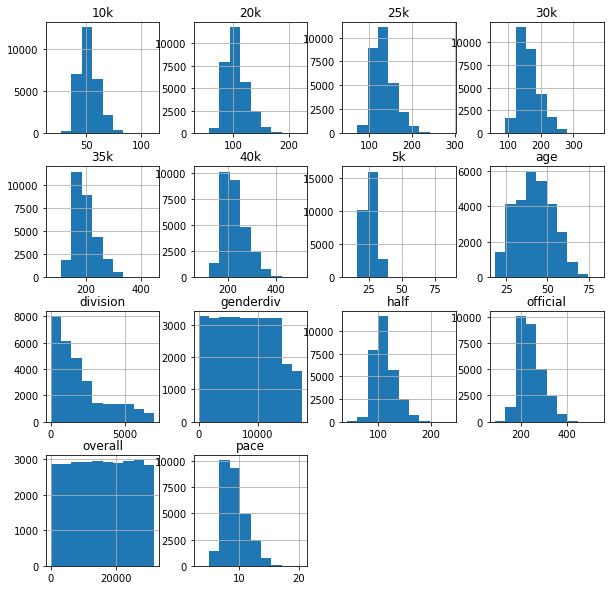

In [368]:
a = data[['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half', 'age', 'official',
      'overall', 'pace', 'genderdiv', 'division']].hist(figsize=(10, 10))


Tuổi những người tham gia tập trung từ 25 đến 52 tuổi, devision tập trung nhiều ở những người có rank từ 1 đến 2500,...

Overall và genderdiv giá trị phân bố đều, không tập trung vào khoảng nào cụ thể, riêng genderdiv, số lượng người tham gia có genderdiv trên 1300 ít hơn 1 nửa so với các khoảng còn lại.

# KMeans

Thử k từ 1 đến 9, so sánh khoảng cách từ center đến các điểm của 1 cluster để tìm k tốt nhất.

In [0]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

distortions = [] 
mapping = {} 
K = range(1,10) 

for k in K: 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(df) 
	kmeanModel.fit(df)	 
	
	distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 
					'euclidean'),axis=1)) / df.shape[0]) 
	mapping[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_, 
				'euclidean'),axis=1)) / df.shape[0] 

In [370]:
for key,val in mapping.items(): 
	print(str(key)+' : '+str(val)) 


1 : 7939.243910425086
2 : 3973.857759755189
3 : 2648.384629379737
4 : 1989.0524272961873
5 : 1592.7271499040726
6 : 1325.651321662323
7 : 1138.014484484778
8 : 994.955291727853
9 : 884.6964197535184


Khoảng cách từ center đến các điểm thuộc 1 cluster giảm dần khi k tăng ---> Số lượng cluster càng lớn thì khoảng cách từ center đến các kiểm của nhóm đó càng giảm. 

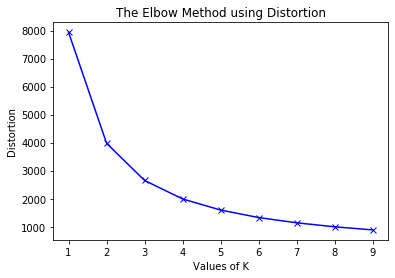

In [371]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

Từ k = 4 trở lên, khoảng cách trung bình giữa center đến các điểm thuộc 1 cluster giảm không nhiều nên sẽ chọn số lượng cluster = 4.

In [0]:
df = data[['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half', 'age', 'official', 'overall', 'pace']]

best_cluster_pred = KMeans(n_clusters=4, random_state=42).fit_predict(df)

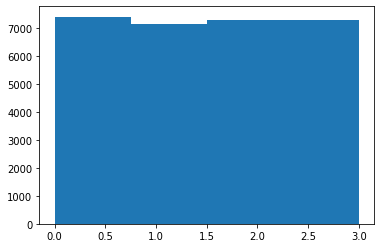

In [374]:
hi = plt.hist(best_cluster_pred, bins=4)

Số lượng vận động viên được phân vào các nhóm là như nhau.

In [0]:
data['cluster'] = best_cluster_pred

In [376]:
data.head()

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,cluster
9,30.48,20,77.68,M,31,137.83,6,20,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83,1
14,17.12,13,48.88,M,29,87.40,W8,13,72.83,13,3.35,ON,60.82,8.02,40.20,38.02,CAN,Port Elgin,82.38,1
15,33.93,10,85.03,F,30,143.90,F8,10,119.68,46,5.50,MI,102.40,16.92,71.68,67.92,USA,Rochester Hills,136.47,1
24,18.30,14,50.33,M,47,89.40,W13,14,74.95,14,3.42,QC,62.33,8.67,41.80,39.63,CAN,St-Jean Baptiste,84.48,1
27,18.78,15,50.33,M,30,89.52,W14,15,75.02,15,3.42,IL,62.72,8.98,41.82,39.65,USA,Champaign,84.75,1


### Gender

In [0]:
gender_female = []
gender_male = []

for i in range(4):
  cluster = data[best_cluster_pred == i]
  gender_female.append(len(cluster[cluster.gender == 'F']))
  gender_male.append(len(cluster[cluster.gender == 'M']))

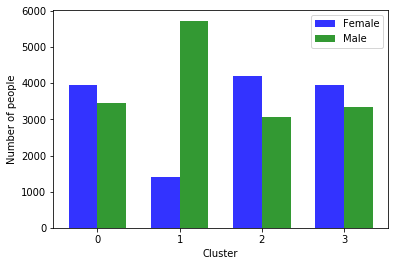

In [378]:
index = np.array([0, 1, 2, 3])

rects1 = plt.bar(index, gender_female, 0.35, alpha=0.8, color='b', label='Female')

rects1 = plt.bar(index + 0.35, gender_male, 0.35, alpha=0.8, color='g', label='Male')

plt.xlabel('Cluster')
plt.ylabel('Number of people')
plt.xticks(index + 0.35/2, ('0', '1', '2', '3'))
plt.legend()

plt.show()

Số lượng nữ ở nhóm 0, 2, 3 nhiều hơn số lượng nam khoảng 10%.

Số lương nam ở nhóm 1 gấp 3 lần so với nữ.

### Age

Chia tuổi thành 3 nhóm:

- Từ 18 đến 25.

- Từ 26 đến 40.

- Trên 40.

In [0]:
def age_group(x):
  if x <= 25:
    return 0
  if x <= 40:
    return 1
  return 2

In [0]:
data['Age_group'] = data.age.apply(lambda x: age_group(x))

In [0]:
age_group_0 = []
age_group_1 = []
age_group_2 = []

for i in range(4):
  cluster = data[best_cluster_pred == i]
  age_group_0.append(len(cluster[cluster.Age_group == 0]))
  age_group_1.append(len(cluster[cluster.Age_group == 1]))
  age_group_2.append(len(cluster[cluster.Age_group == 2]))


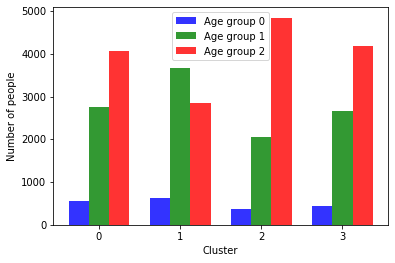

In [382]:
index = np.array([0, 1, 2, 3])

rects1 = plt.bar(index, age_group_0, 0.25, alpha=0.8, color='b', label='Age group 0')

rects1 = plt.bar(index + 0.25, age_group_1, 0.25, alpha=0.8, color='g', label='Age group 1')

rects1 = plt.bar(index + 0.25*2, age_group_2, 0.25, alpha=0.8, color='r', label='Age group 2')

plt.xlabel('Cluster')
plt.ylabel('Number of people')
plt.xticks(index + 0.25, ('0', '1', '2', '3'))
plt.legend()

plt.show()

Số lượng những người dưới 25 tuổi ở tất cả 4 nhóm đều nhỏ hơn nhiều so với các nhóm tuổi còn lại.

Số lượng những người trên 40 tuổi ở nhóm 0, 2, 3 cao hơn nhất so với các lứa tuổi khác, đặc biệt nhóm 2 có số lượng người trên 40 tuổi gấp hơn 2 lần số người dưới 40 tuổi.

Nhóm 1 là nhóm duy nhất có số người trông độ tuổi từ 26 đến 46 chiến tỷ lệ cao nhất, bằng tổng số ngươi dưới 25 và trên 40 tuổi cộng lại.

### Official time

In [0]:
import seaborn as sns

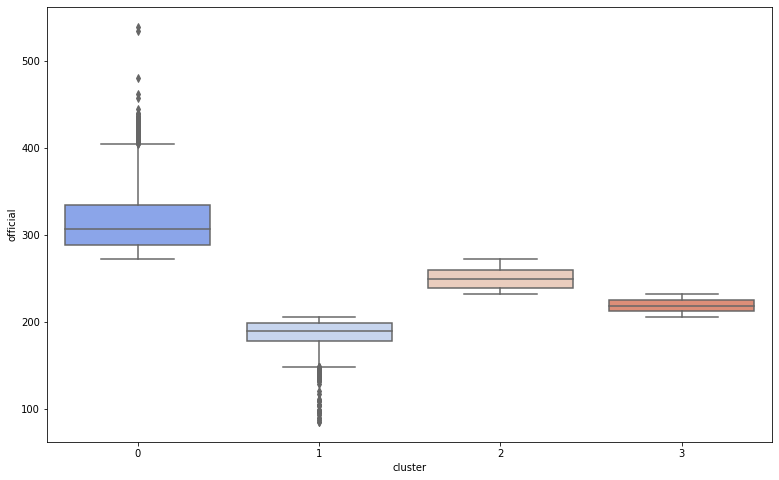

In [354]:
g = sns.boxplot(data['cluster'], data.official, palette="coolwarm")
g.figure.set_size_inches(13,8)

Nhóm 1 là nhóm có thời gian chạy nhanh nhất, sau đó đến nhóm 3, theo sau là nhóm 2.

Nhóm 0 có thời gian chạy lâu nhất.

# Conclusions

KMeans chia dữ liệu thành 4 nhóm.

Nhóm 1 chạy nhanh nhất do số lượng nam nhiều gấp 3 lần so với số lượng nữ, các nhóm khác có số lượng nữ cao hơn nam. Hơn nữa nhóm 1 có độ tuổi tập trung từ 26 đến 40 tuổi cao hơn các độ tuổi khác, ngược lại các nhóm còn lại có số người từ 26 đến 40 tuổi lại thấp hơn, đặc biệt nhóm 2 có số lượng người trên 40 tuổi lớn nhất.

Tuy nhóm 1 có số lượng người trẻ tuổi nhiều hơn nhóm 2 và nhóm 3, số lượng người cao tuổi ít hơn nhóm 2 và nhóm 3 nhưng lại có thời gian chạy lâu nhất.